Looking at the samples from https://ui.adsabs.harvard.edu/abs/2021arXiv210306892I/abstract to see if there's potential for a project looking at TESS data for the stars.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii

import astropy.units as u

import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = 'tables/'

In [3]:
ls tables

tablea1.dat  tablea2.dat


In [4]:
wddm = Table.read('{}tablea1.dat'.format(path))
wddm.dtype.names

IORegistryError: Format could not be identified based on the file name or contents, please provide a 'format' argument.
The available formats are:
           Format           Read Write Auto-identify Deprecated
--------------------------- ---- ----- ------------- ----------
                      ascii  Yes   Yes            No           
               ascii.aastex  Yes   Yes            No           
                ascii.basic  Yes   Yes            No           
                  ascii.cds  Yes    No            No           
     ascii.commented_header  Yes   Yes            No           
                  ascii.csv  Yes   Yes           Yes           
              ascii.daophot  Yes    No            No           
                 ascii.ecsv  Yes   Yes           Yes           
           ascii.fast_basic  Yes   Yes            No           
ascii.fast_commented_header  Yes   Yes            No           
             ascii.fast_csv  Yes   Yes            No           
       ascii.fast_no_header  Yes   Yes            No           
             ascii.fast_rdb  Yes   Yes            No           
             ascii.fast_tab  Yes   Yes            No           
          ascii.fixed_width  Yes   Yes            No           
ascii.fixed_width_no_header  Yes   Yes            No           
 ascii.fixed_width_two_line  Yes   Yes            No           
                 ascii.html  Yes   Yes           Yes           
                 ascii.ipac  Yes   Yes            No           
                ascii.latex  Yes   Yes           Yes           
                  ascii.mrt  Yes   Yes            No           
            ascii.no_header  Yes   Yes            No           
                  ascii.qdp  Yes   Yes           Yes           
                  ascii.rdb  Yes   Yes           Yes           
                  ascii.rst  Yes   Yes            No           
           ascii.sextractor  Yes    No            No           
                  ascii.tab  Yes   Yes            No           
                       asdf  Yes   Yes           Yes           
                       fits  Yes   Yes           Yes           
                       hdf5  Yes   Yes           Yes           
                 pandas.csv  Yes   Yes            No           
                 pandas.fwf  Yes    No            No           
                pandas.html  Yes   Yes            No           
                pandas.json  Yes   Yes            No           
                    parquet  Yes   Yes           Yes           
            parquet.votable  Yes   Yes            No           
                    votable  Yes   Yes           Yes           
            votable.parquet  Yes   Yes            No           
                     aastex  Yes   Yes            No        Yes
                        cds  Yes    No            No        Yes
                        csv  Yes   Yes            No        Yes
                    daophot  Yes    No            No        Yes
                       html  Yes   Yes            No        Yes
                       ipac  Yes   Yes            No        Yes
                      latex  Yes   Yes            No        Yes
                        mrt  Yes   Yes            No        Yes
                        rdb  Yes   Yes            No        Yes

In [5]:
len(wddm[wddm['porb']> 0])

73

In [6]:
mask = wddm['porb']> 0

In [7]:
no_p = wddm[~mask]
yes_p = wddm[mask]

(array([18.,  9., 10.,  8.,  4.,  1.,  4.,  2.,  1.,  4.,  1.,  1.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  1.698   ,   3.755284,   5.812568,   7.869852,   9.927136,
         11.98442 ,  14.041704,  16.098988,  18.156272,  20.213556,
         22.27084 ,  24.328124,  26.385408,  28.442692,  30.499976,
         32.55726 ,  34.614544,  36.671828,  38.729112,  40.786396,
         42.84368 ,  44.900964,  46.958248,  49.015532,  51.072816,
         53.1301  ,  55.187384,  57.244668,  59.301952,  61.359236,
         63.41652 ,  65.473804,  67.531088,  69.588372,  71.645656,
         73.70294 ,  75.760224,  77.817508,  79.874792,  81.932076,
         83.98936 ,  86.046644,  88.103928,  90.161212,  92.218496,
         94.27578 ,  96.333064,  98.390348, 100.447632, 102.504916,
        104.5622  ]),
 <BarContainer

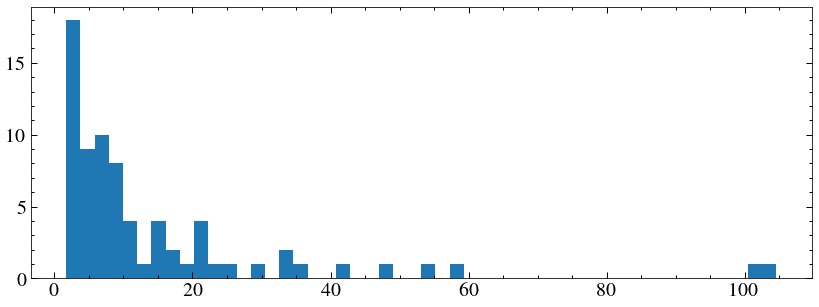

In [8]:
plt.hist(yes_p['porb'], bins =50)

16.410276465219994 16.73215484619141 1.6201052287097149
17.124330194984996 17.12503242492676 1.024579546524035


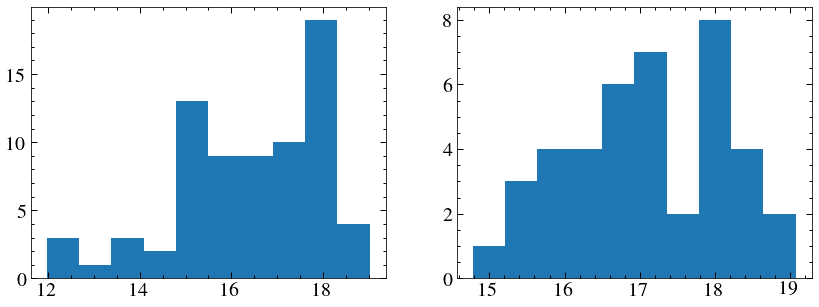

In [9]:
plt.subplot(121)
plt.hist(yes_p['phot_g_mean_mag'])
plt.subplot(122)
plt.hist(no_p['phot_g_mean_mag'])
for sample in (yes_p['phot_g_mean_mag'], no_p['phot_g_mean_mag']):
    print(np.mean(sample), np.median(sample), np.std(sample))

Galex data - how many could we observe with HST?

In [12]:
wddm[wddm['name']=='CC Cet']['fuv_mag']

14.0291481


In [14]:
len(wddm)

114

(array([0., 1., 0., 6., 8., 9., 8., 7., 6., 3., 7., 3., 2.]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
 <BarContainer object of 13 artists>)

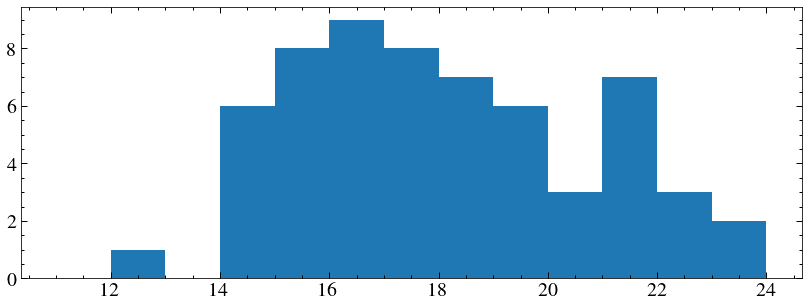

In [20]:
plt.hist(wddm['fuv_mag'], bins = [11, 12, 13, 14,15, 16, 17, 18, 19, 20, 21,22,23, 24])

In [18]:
np.min(wddm['fuv_mag'])

12.7916222

In [24]:
len(wddm['fuv_mag'][(wddm['fuv_mag'] > 0) & (wddm['fuv_mag'] < 16)])

15